# King County House Price Prediction

## 1. KC House Sale DataSet

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

df = pd.read_csv("kc_house_data.csv", )
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
size = len(df)
size

21613

## 2. Price-Size Scatter Plot

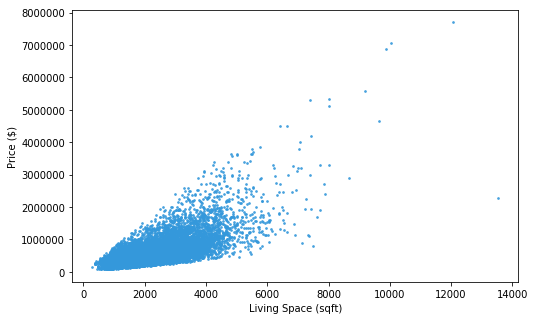

In [3]:
import matplotlib.pyplot as plt

df = df[['price', 'sqft_living']]
x = df['sqft_living']
y = df['price']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=3, c='#3498DB', alpha=0.8, label = 'Predicted Regression Line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price ($)')
plt.show()

## 3. Gradient Decent

In [ ]:
a = 0.01            # learning rate
z0 = 0              # theta_0
z1 = 50             # theta_1
cvg_limit = 1e-3    # declare convergence
x = x / 1000        # scaling x
y = y / 1000        # scaling y
size = 100


def getE(z0, z1, x, y):
    e0 = 0
    e1 = 0
    for i in range(size):
        r0 = (z0 + z1 * x[i]) - y[i]
        r1 = ((z0 + z1 * x[i]) - y[i]) * x[i]
        e0 += r0 * (1. / size)
        e1 += r1 * (1. / size)
    return e0, e1


def gradient_descent(z0, z1, x, y):
    e0, e1 = getE(z0, z1, x, y)
    while abs(e0) >= cvg_limit and abs(e1) >= cvg_limit:
        z0 = z0 - a * e0
        z1 = z1 - a * e1
        e0, e1 = getE(z0, z1, x, y)
    return z0, z1


w0, w1 = gradient_descent(z0, z1, x, y)
x = x * 1000
y = y * 1000
y_predict = w0 + w1 * x

plt.figure(figsize=(8,5))

# Predicted Line
plt.plot(x, y_predict, c='#BA4A00', alpha=0.8, linewidth=1)
# Training Data
plt.scatter(x, y, c='#3498DB', alpha=0.4, s=4, label='Predicted Regression Line')

plt.title('King County House Price Prediction')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price ($)')

plt.show()
